# Customer Exits in a Bank

In [79]:
# Library Used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df = pd.read_csv("Churn_Modelling.csv")

In [81]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [83]:
# Replacing the numerical value of the column to categorical value
df['HasCrCard'] = df['HasCrCard'].replace({0: 'No', 1: 'Yes'})
df['IsActiveMember'] = df['IsActiveMember'].replace({0: 'No', 1: 'Yes'})
df['Exited'] = df['Exited'].replace({0: 'No', 1: 'Yes'})

# Cleaning the Data 

In [84]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Surprisingly, there is no missing value in the dataset. It is good to proceed with further steps.

# EDA

## Insight

In [85]:
df_exit = df['Exited'].value_counts(normalize = True)
print(f'People divided by exit in percentage: \n{df_exit}')

People divided by exit in percentage: 
No     0.7963
Yes    0.2037
Name: Exited, dtype: float64


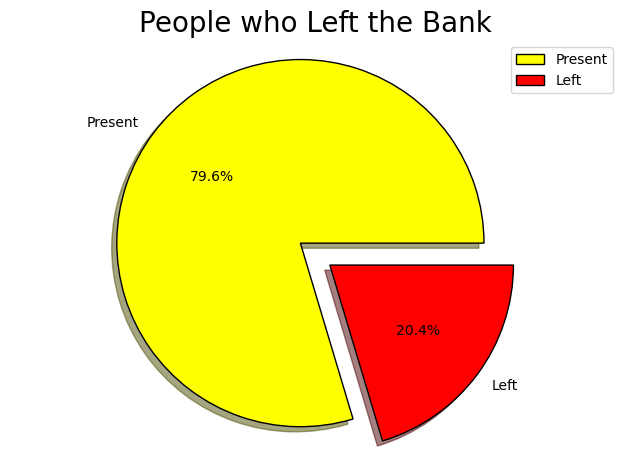

In [86]:
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
plt.pie(df_exit, 
        labels = ['Present','Left'],
        colors = ['yellow', 'red'],
        autopct = '%0.1f%%',
        explode = [0, 0.2],
        wedgeprops = wp,shadow=True
      );
plt.title("People who Left the Bank",fontsize=20)
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.tight_layout()

### In the big picture, the bank's number is not excellent. 20% of the bank's customers recently left, which is a severe issue that needs to be addressed. Current customers may stop using the services this bank offers if the issue is not remedied. Let's look into the reasons why 20% of clients leave.

## Insight

Text(0.5, 1.0, 'Age Wise Client Exits')

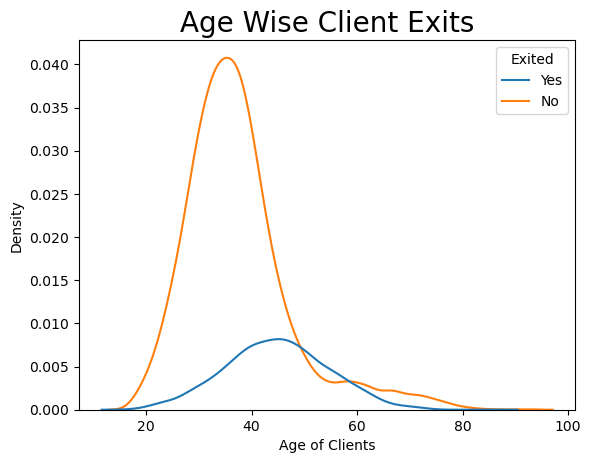

In [87]:
sns.kdeplot(df, x="Age", hue="Exited").set(xlabel="Age of Clients")
plt.title("Age Wise Client Exits", fontsize=20)

### Bank have got good number of clients from the age base of 25 to 45, especially the age between 35-40. However, if we go forward in age there are some unacceptable results waiting. Clients from the age 50 to 65 has been completly disatisfied from the services that bank offer. More churn in the clients can be found than the one's who is currently present. 
### This shows the poor level of services they offer to the senior citizens. It is advised on accords to the above chart to revise their strategies in the service offered. Probably, changes might lead to a positive outcome.

## Insight(How is the performance around different geography?)

Text(0.5, 1.0, 'Exits Over Countries')

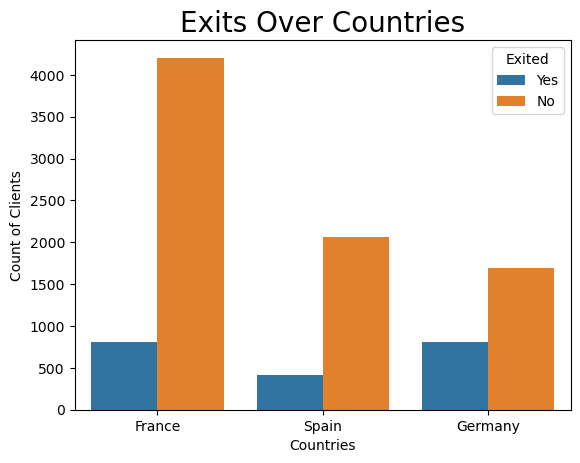

In [88]:
sns.countplot(df, x="Geography",hue="Exited").set(xlabel="Countries",ylabel="Count of Clients")
plt.title("Exits Over Countries", fontsize=20)

### Overall, France has done quite a good job compared to other two European countries. Bank's performance in Spain is fairly good. The bank's operation in Germany is little pathetic condition, and requires greater focus on it. Compared to clients who remain in the service about half of the total has left the service. This is an alarming condition in the branches of the bank that operates in Germany. 
### Immediate measures needed to be taken in the services offered over German banks. Good changes might bring positive outcome. 

## Insight

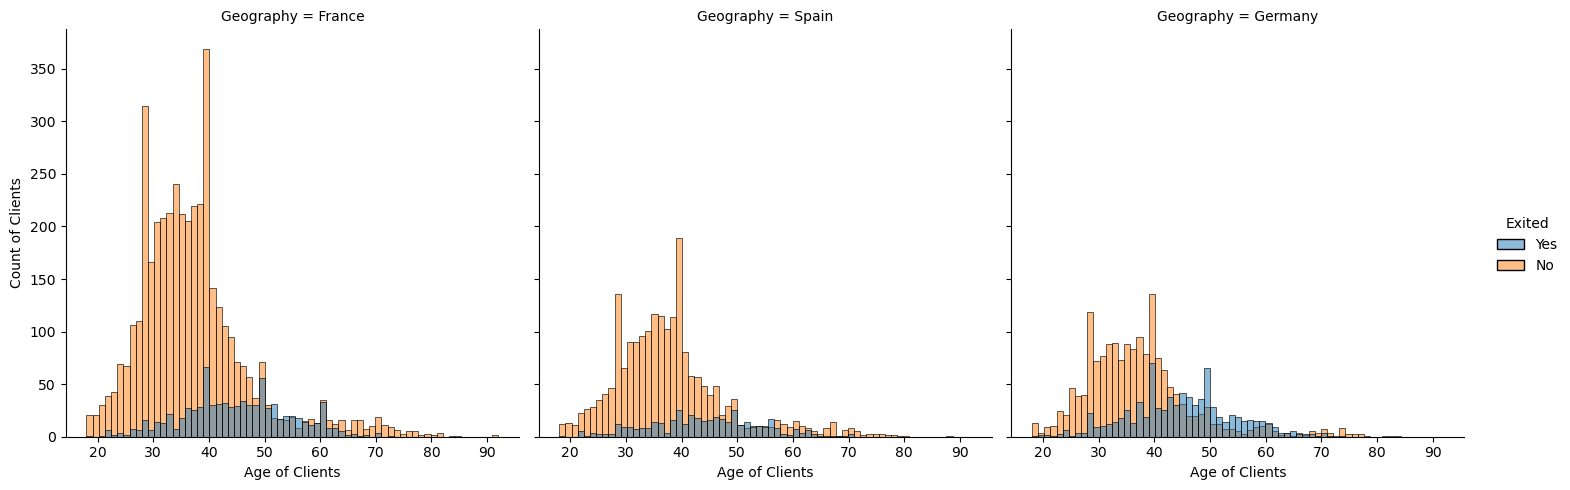

In [89]:
sns.displot(df, x="Age", hue="Exited",height=5,col="Geography").set(xlabel="Age of Clients",ylabel="Count of Clients")


### The above chart also supports our previous insights too. Out of all three countries, the banks in Germany is fully evident that more senior citizens quit the service. So, board of the bank must immediately revisit the strategies especially in Germany. 
### The negative effect in France and Spain is not visible like Germany. However, it is recommended to bring changes in the startegies in both the countries. By this banks in those countries can avoid the badly hit situation of Germany. 

## Insight

Text(0.5, 1.0, 'Age Over Account Balance')

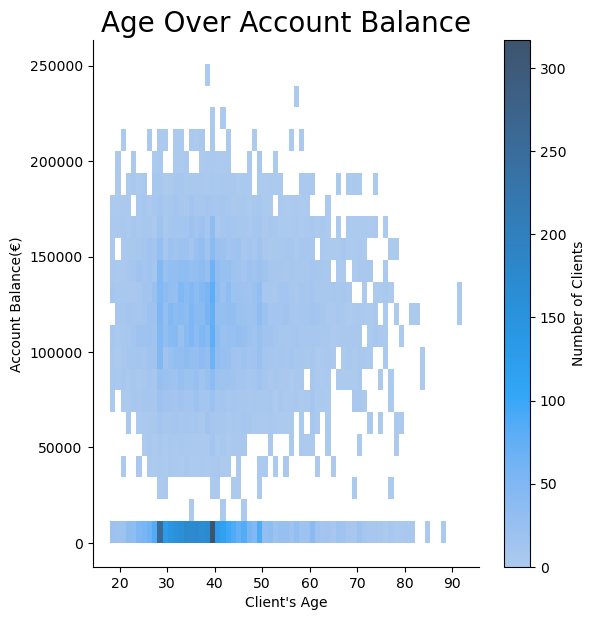

In [90]:
sns.displot(data=df, x="Age", y="Balance",cbar_kws={"label": "Number of Clients"},cbar=True,height=6).set(xlabel="Client's Age",ylabel="Account Balance(€)")
plt.title("Age Over Account Balance",fontsize=20)

### There is no proper correlation between the age of the clients and the account balance. However, one thing is visible, most of the clients of the age 27 to 44 had very low account balance. Probably, it can be a matter of fact that more the clients are available, the more there are inactive clients.
### How about the correlation of other variables? Let us see it in upcoming insight.

## Insight

<AxesSubplot:>

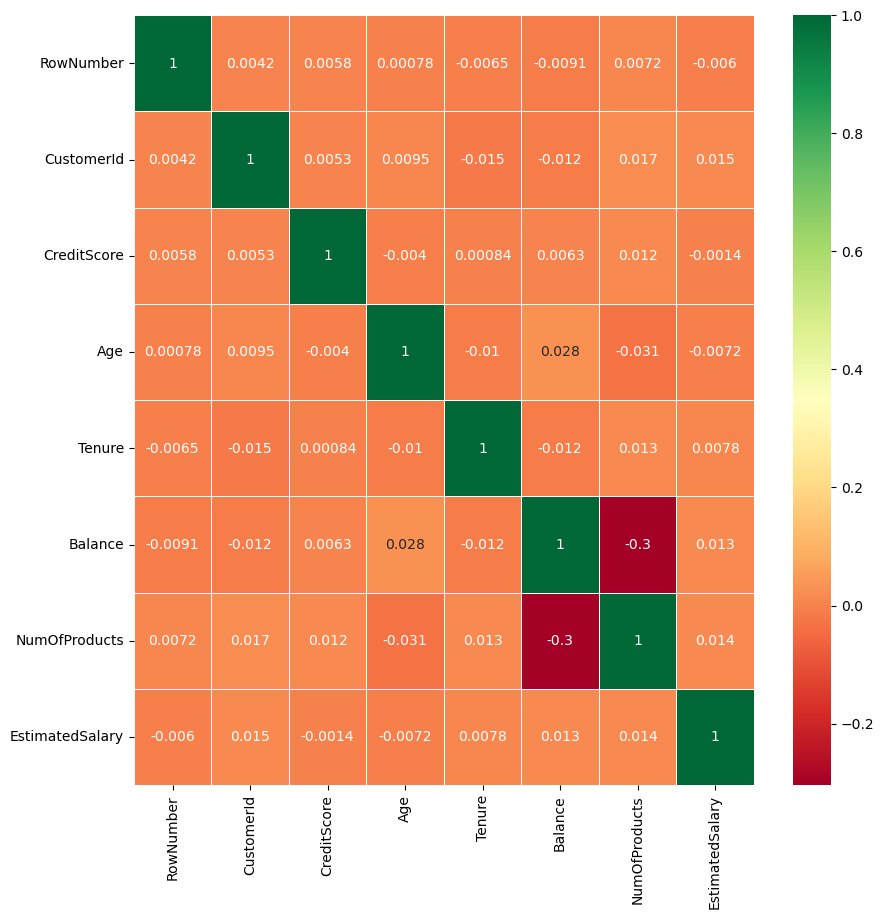

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap ='RdYlGn',linewidth=.5,ax=ax)

### If we look at the eagles eye view of the correlation among the variables, there is nothing much to comment. There is no such variables that have strong relationship to convey any form insight. Although there are some positive correlation have in certain variables, but it is not enough to convey the banks performance.

## Insight

In [92]:
df_exited = df[(df["Exited"] == "Yes")]

Text(0.5, 1.0, 'Number of Clients Over Account Balance')

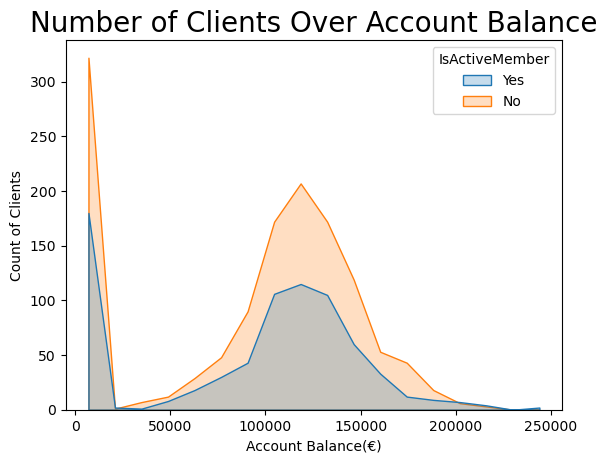

In [93]:
sns.histplot(data = df_exited,x="Balance", element="poly",hue="IsActiveMember").set(ylabel="Count of Clients",xlabel="Account Balance(€)")
plt.title("Number of Clients Over Account Balance",fontsize=20)

### As usual in any banks, we can see that clients with very less account balance has left organisation. Especially the one's who were less active was in high number leaving our services. Moreover, there are people with more account balance leaving. This trend must not continue, or else there can be worse future that any banks in the world has not faced.
### Surprisingly, data is showing more active members with less balance compared to the clients with account balance of more than €100000. I am not sure what kind of active members who had a very low account balance. There can be chances of them using other services that does not involve the funds transfer between their account.Ex: Credit card, loan services.

## Insight

In [94]:
grouped_df = df.groupby(["Geography","HasCrCard"])[["CreditScore"]].mean().reset_index()

Text(0.5, 1.0, 'Credit Scores Over Countries')

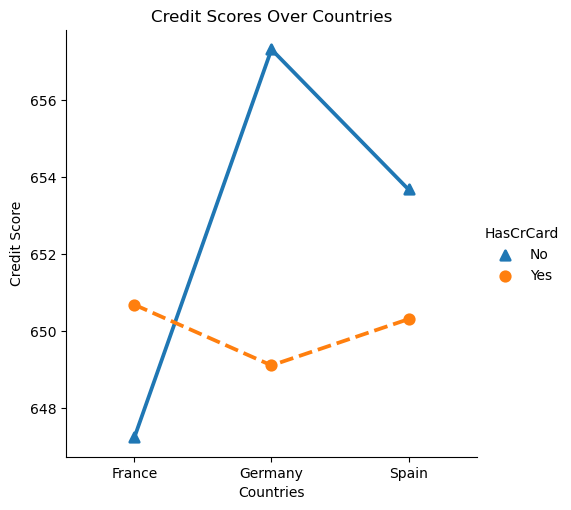

In [95]:
sns.catplot(
    data=grouped_df, x="Geography", y="CreditScore", hue="HasCrCard",
    kind="point",
    markers=["^", "o"], linestyles=["-", "--"],).set(xlabel="Countries",ylabel="Credit Score")
plt.title("Credit Scores Over Countries")

### On average credit scores of clients, there is no much difference between these countries. However, one can notice that clients in Germany has maintained good credit score compared to other countries. 
### As usual, the clients with credit card probably suffer in their credit scores due to the factor of default on the payment due. Interestingly, the country(Germany) that had an good average credit score lacks on consideration with the clients with credit card.
### Germans are really interesting people.

## Insight

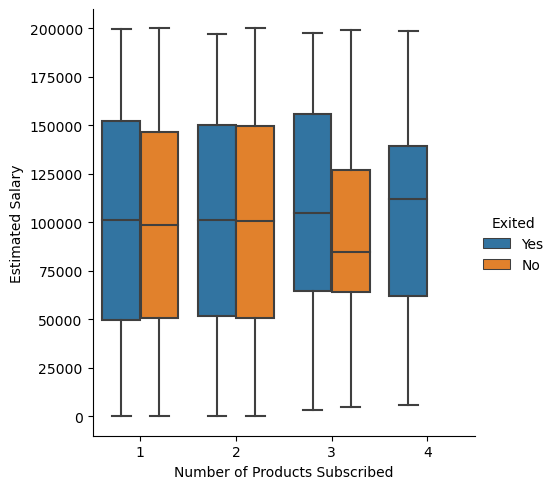

In [96]:
sns.catplot(data=df, x="NumOfProducts", y="EstimatedSalary", hue="Exited", kind="box").set(xlabel="Number of Products Subscribed",ylabel="Estimated Salary")

### This box chart gives a greater shock for the company. We can see that all the clients who subscribed all the products of the bank has faded away. In other words, all the customer once liked this bank just packed their bags and shifted away to other banks. More than 50% of this type of client had more than €110000 balance in their account. I am sure they are highly disappointed with all the products provided to them.
### Only a loyal customer purchase all the products of a bank. If loyal clients are dissatisfied then there is something unexpected in upcoming days.
### This bank must wakeup. As I said at the beginning this is really a alarming state. 

## Insight

In [97]:
df_exited = df[(df["Exited"] == "Yes")]

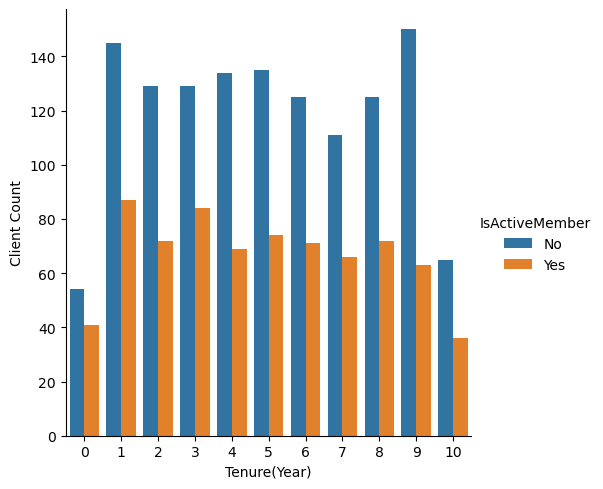

In [98]:
df_agg = df_exited.groupby(['Tenure', 'IsActiveMember'])["RowNumber"].count().reset_index()
sns.catplot(data=df_agg, y="RowNumber", x="Tenure", hue="IsActiveMember", kind="bar").set(ylabel="Client Count",xlabel="Tenure(Year)")

### Hmmm, clients who are not active has left more compared to the active one's. When we look onto our recent customers(tenure with 0 years), more active members have left, on proportion to no active members compared to other customers with different tenure. 
### This shows that current strategies what the bank possess is not satisfying the new clients who are especially active. Strategies needs a change to retain active clients and convert the non-active clients to active client.


# END WITH EDA

# Begin the Churn Analytics

In [99]:
df = pd.read_csv("Churn_Modelling.csv")

In [100]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [101]:
df = df.drop(["Surname","CustomerId"],axis=1)

In [102]:
df_object = df.select_dtypes(include=object)

In [103]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Geography  10000 non-null  object
 1   Gender     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


<AxesSubplot:>

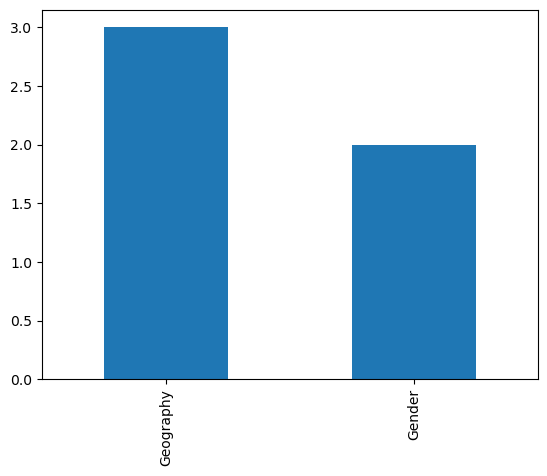

In [104]:
df_object.nunique().plot(kind='bar')

In [105]:
df_numerical = df.select_dtypes(include=[int,float])

In [106]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


## One Hot Coding

In [107]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [108]:
enc = OneHotEncoder()

In [109]:
enc.fit(df_object)

OneHotEncoder()

In [110]:
enc.fit_transform(df_object)

<10000x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20000 stored elements in Compressed Sparse Row format>

## Creating a dataframe out

In [111]:
df_object = pd.DataFrame(enc.transform(df_object).toarray(), columns = enc.get_feature_names_out())


In [112]:
df_numerical

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,42,2,0.00,1,1,1,101348.88,1
1,2,608,41,1,83807.86,1,0,1,112542.58,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1
3,4,699,39,1,0.00,2,0,0,93826.63,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1


## Joining the categorical and numrical columns

In [113]:
df = df_object.join(df_numerical)

In [114]:
df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,1,619,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,1.0,0.0,2,608,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,1.0,0.0,3,502,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,1.0,0.0,4,699,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,1.0,0.0,5,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,9996,771,39,5,0.00,2,1,0,96270.64,0
9996,1.0,0.0,0.0,0.0,1.0,9997,516,35,10,57369.61,1,1,1,101699.77,0
9997,1.0,0.0,0.0,1.0,0.0,9998,709,36,7,0.00,1,0,1,42085.58,1
9998,0.0,1.0,0.0,0.0,1.0,9999,772,42,3,75075.31,2,1,0,92888.52,1


## Let's set the Y and X ready

In [115]:
# Y has the integer already, so there was no label encoding required
y = df["Exited"]
x = df.drop("Exited",axis =1)

In [116]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Splitting the data

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [118]:
X_train

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,0.0,0.0,1.0,1.0,0.0,9070,619,32,4,175406.13,2,1,1,172792.43
2603,0.0,1.0,0.0,1.0,0.0,2604,643,34,7,160426.07,1,0,1,188533.11
7738,1.0,0.0,0.0,0.0,1.0,7739,561,33,6,0.00,2,0,0,173680.39
1579,0.0,1.0,0.0,0.0,1.0,1580,618,41,8,37702.79,1,1,1,195775.48
5058,1.0,0.0,0.0,0.0,1.0,5059,714,37,9,148466.93,2,0,1,151280.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,0.0,0.0,0.0,1.0,5735,768,54,8,69712.74,1,1,1,69381.05
5191,1.0,0.0,0.0,1.0,0.0,5192,682,58,1,0.00,1,1,1,706.50
5390,1.0,0.0,0.0,1.0,0.0,5391,735,38,1,0.00,3,0,0,92220.12
860,1.0,0.0,0.0,0.0,1.0,861,667,43,8,190227.46,1,1,0,97508.04


## Call out the decision tree classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
clf = DecisionTreeClassifier(min_samples_split=1000)

In [121]:
clf = clf.fit(X_train,y_train)

In [122]:
y_train_pre = clf.predict(X_train)

In [123]:
y_test_pre = clf.predict(X_test)

## Training Accuracy

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(y_train, y_train_pre)

0.8387142857142857

## Testing Accuracy

In [126]:
accuracy_score(y_test,y_test_pre)

0.846

## Confusion Matrix

In [127]:
from sklearn import metrics

In [128]:
# For testing data
cm = metrics.confusion_matrix(y_test, y_test_pre)

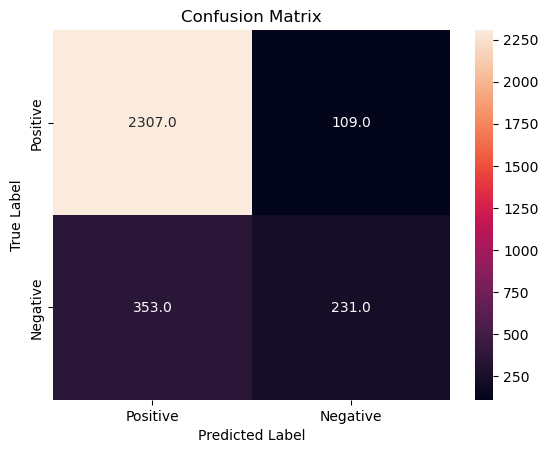

In [129]:
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = ".1f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [130]:
# For training data
cm = metrics.confusion_matrix(y_train, y_train_pre)

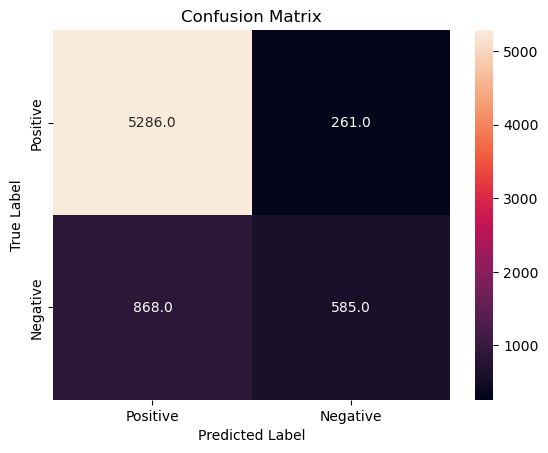

In [131]:
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = ".1f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()